In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Functions

In [9]:
def create_graph(file_path):
    '''
    Reads file with an edgelist and creates NetworkX graph from it.

    Parameters:
        file_path (str): Path to the file containing the edge list.

    Returns:
        G (networkx.Graph): Graph created from the edgelist.
    '''
    G = nx.Graph() # Create an empty graph object
    with open(file_path, 'r') as file: # Open the file containing the edgelist
        for line in file:
            node1, node2 = line.strip().split('\t') # Split ech line by the tab into two nodes
            G.add_edge(node1, node2) # Add edges to the graph
    return G

## Functions for eigenvector analysis

In [3]:
def compute_eigenvalues(L):
    '''
    Compute the eigenvalues of a given Laplacian matrix.

    Parameters:
        L (numpy.ndarray): Laplacian matrix of the graph.

    Returns:
        numpy.ndarray: Array of eigenvalues sorted in ascending order
    '''
    return np.linalg.eigvalsh(L)

In [4]:
def plot_eigenvalues(original_eigenvalues, sparsified_eigenvalues, save_fig = None):
    """
    Plot the eigenvalues of the original and sparsified graphs.

    Parameters:
        original_eigenvalues (numpy.ndarray): Eigenvalues of the original graph.
        sparsified_eigenvalues (numpy.ndarray): Eigenvalues of the sparsified graph.
        save_fig (str, optional): Location to save the figure as a PDF file.
    """

    plt.figure(figsize=(12, 6)) # Determining figure size

    plt.plot(original_eigenvalues, label='Original Graph', color='navy') # Plotting the eigenvalues of the original graph
    plt.plot(sparsified_eigenvalues, label='Sparsified Graph', color='firebrick') # Plotting the eigenvalues of the sparsified graph
    
    # Adding labels and adjusting font size
    plt.xlabel('Index', fontsize=20)
    plt.ylabel('Eigenvalue', fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(fontsize=15)
    plt.title('Eigenvalue Comparison', fontsize=20)

    # Saving the figure if specified
    if save_fig:
        plt.tight_layout()
        plt.savefig(save_fig, format='pdf')

    plt.show()

In [5]:
def plot_first_k_eigenvalues(original_eigenvalues, sparsified_eigenvalues, k, save_fig = None):
    """
    Plot the first k eigenvalues of the original and sparsified graphs.

    Parameters:
        original_eigenvalues (numpy.ndarray): Eigenvalues of the original graph.
        sparsified_eigenvalues (numpy.ndarray): Eigenvalues of the sparsified graph.
        k (int): Number of eigenvalues to plot.
        save_fig (str, optional): Location to save the figure as a PDF file.
    """

    plt.figure(figsize=(12, 6)) # Determining figure size

    plt.plot(original_eigenvalues[:k], label='Original Graph', color='navy') # Plotting the first k eigenvalues of the original graph
    plt.plot(sparsified_eigenvalues[:k], label='Sparsified Graph', color='firebrick') # Plotting the first k eigenvalues of the sparsified graph
    
    # Adding labels and adjusting font size
    plt.xlabel('Index', fontsize=20)
    plt.ylabel('Eigenvalue', fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(fontsize=15)
    plt.title(f'Comparison of First {k} Eigenvalues', fontsize=20)

    # Saving the figure if specified
    if save_fig:
        plt.tight_layout()
        plt.savefig(save_fig, format='pdf')

    plt.show()

In [6]:
def relative_error(eigenvalues_original, eigenvalues_sparsified, k):
    """
    Compute the mean relative error for the first k eigenvalues.

    Parameters:
        eigenvalues_original (numpy.ndarray): Eigenvalues of the original graph.
        eigenvalues_sparsified (numpy.ndarray): Eigenvalues of the sparsified graph.
        k (int): Number of eigenvalues to include in the error calculation.

    Returns:
        float: Mean relative error for the first k eigenvalues.
    """
    
    return np.mean(np.abs((eigenvalues_original[:k] - eigenvalues_sparsified[:k]) / eigenvalues_original[:k]))

In [7]:
def mean_squared_error(eigenvalues_original, eigenvalues_sparsified, k):
    """
    Compute the mean squared error for the first k eigenvalues.

    Parameters:
        eigenvalues_original (numpy.ndarray): Eigenvalues of the original graph.
        eigenvalues_sparsified (numpy.ndarray): Eigenvalues of the sparsified graph.
        k (int): Number of eigenvalues to include in the error calculation.

    Returns:
        float: Mean squared error for the first k eigenvalues.
    """
    
    return np.mean((eigenvalues_original[:k] - eigenvalues_sparsified[:k]) ** 2)


In [8]:
def full_spectral_analysis(G, S, k):
    """
    Perform a full spectral analysis comparing the original and sparsified graphs.

    Parameters:
        G (networkx.Graph): The original graph.
        S (networkx.Graph): The sparsified graph.
        k (int): Number of eigenvalues to analyze for error metrics and plotting.

    Returns:
        dict: Contains the original and sparsified eigenvalues, relative error, and mean squared error.
    """
    
    # Compute Laplacian matrices for both graphs
    L_original = nx.laplacian_matrix(G).toarray()
    L_sparsified = nx.laplacian_matrix(S).toarray()

    # Compute eigenvalues of each Laplacian matrix
    original_eigenvalues = compute_eigenvalues(L_original)
    sparsified_eigenvalues = compute_eigenvalues(L_sparsified)

    # Plot all eigenvalues for visual comparison
    plot_eigenvalues(original_eigenvalues, sparsified_eigenvalues)

    # Plot only the first k eigenvalues for a closer comparison
    plot_first_k_eigenvalues(original_eigenvalues, sparsified_eigenvalues, k)

    # Calculate error metrics for the first k eigenvalues
    rel_error = relative_error(original_eigenvalues, sparsified_eigenvalues, k)
    mse = mean_squared_error(original_eigenvalues, sparsified_eigenvalues, k)

    # Output error metrics
    print(f"Relative Error for first {k} eigenvalues: {rel_error:.4f}")
    print(f"Mean Squared Error for first {k} eigenvalues: {mse:.4f}")

    return {
        "original_eigenvalues": original_eigenvalues,
        "sparsified_eigenvalues": sparsified_eigenvalues,
        "relative_error": rel_error,
        "mean_squared_error": mse
    }

# Analysis

disease on genes


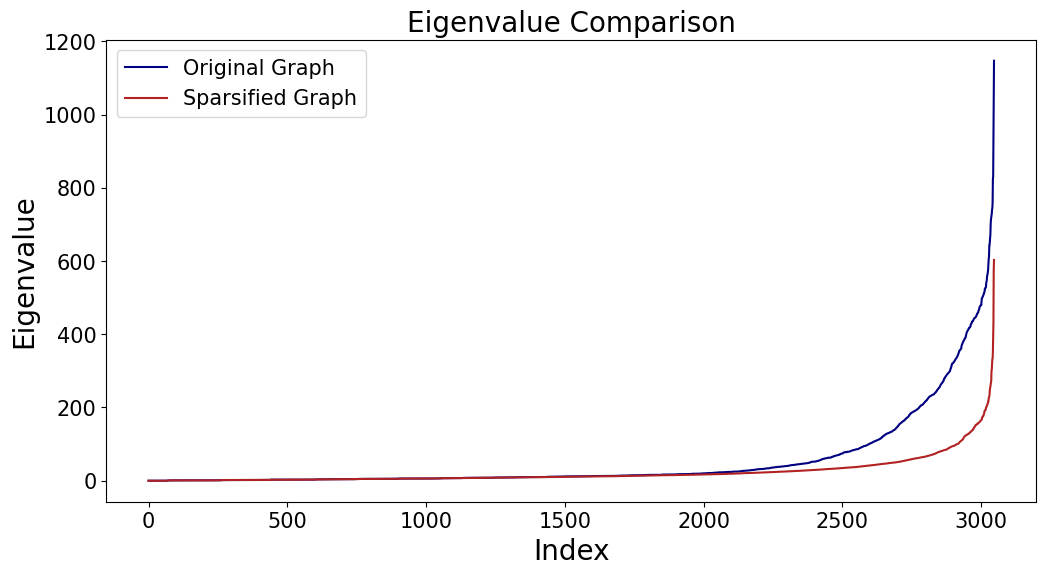

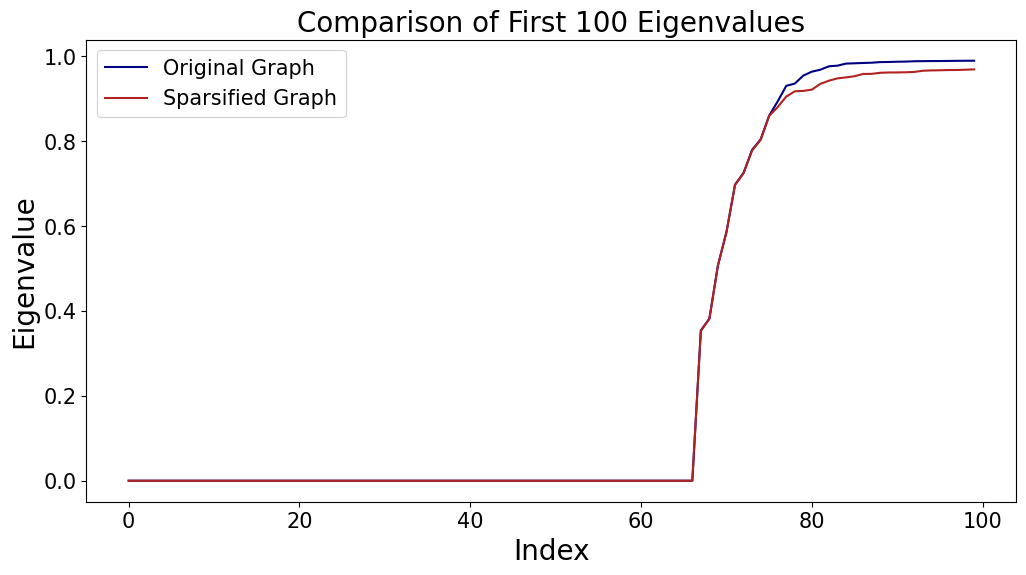

/var/folders/gf/fc8gsm5d29v7kgwh085qwm1c0000gp/T/ipykernel_2464/3131771206.py:14: RuntimeWarning: invalid value encountered in divide
  return np.mean(np.abs((eigenvalues_original[:k] - eigenvalues_sparsified[:k]) / eigenvalues_original[:k]))


Relative Error for first 100 eigenvalues: nan
Mean Squared Error for first 100 eigenvalues: 0.0002
disease on symptoms


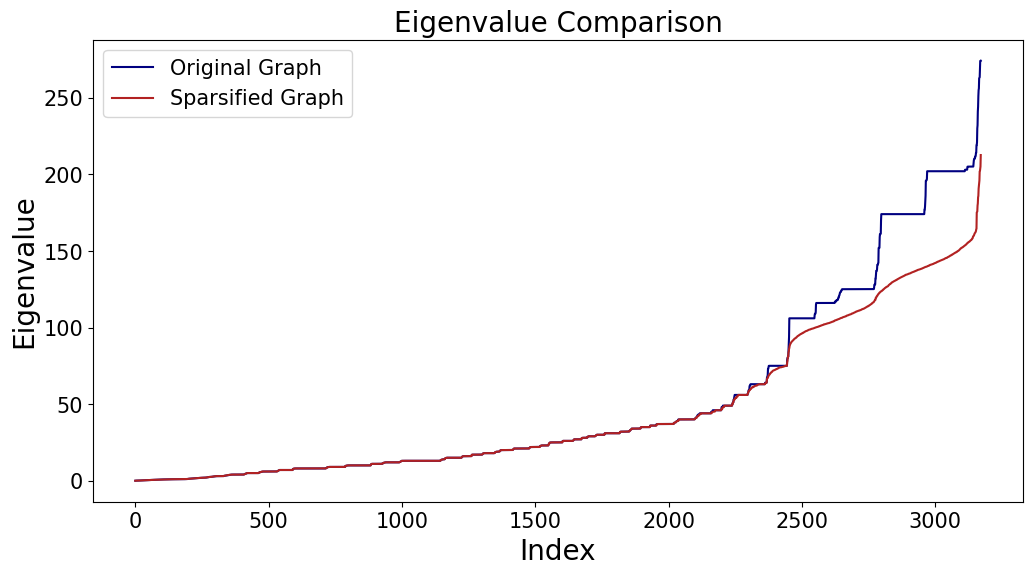

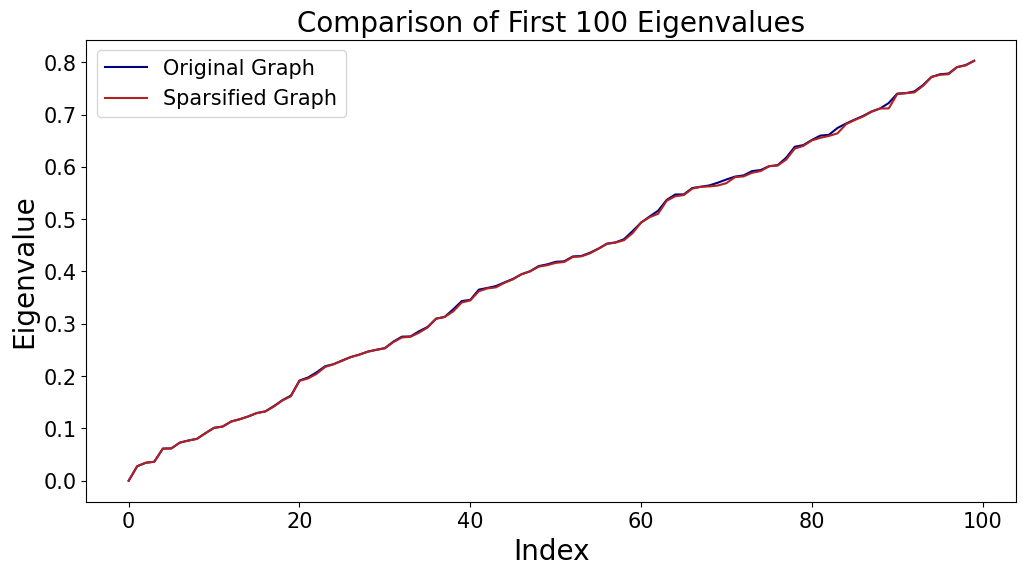

Relative Error for first 100 eigenvalues: 1.3697
Mean Squared Error for first 100 eigenvalues: 0.0000
disease on drugs


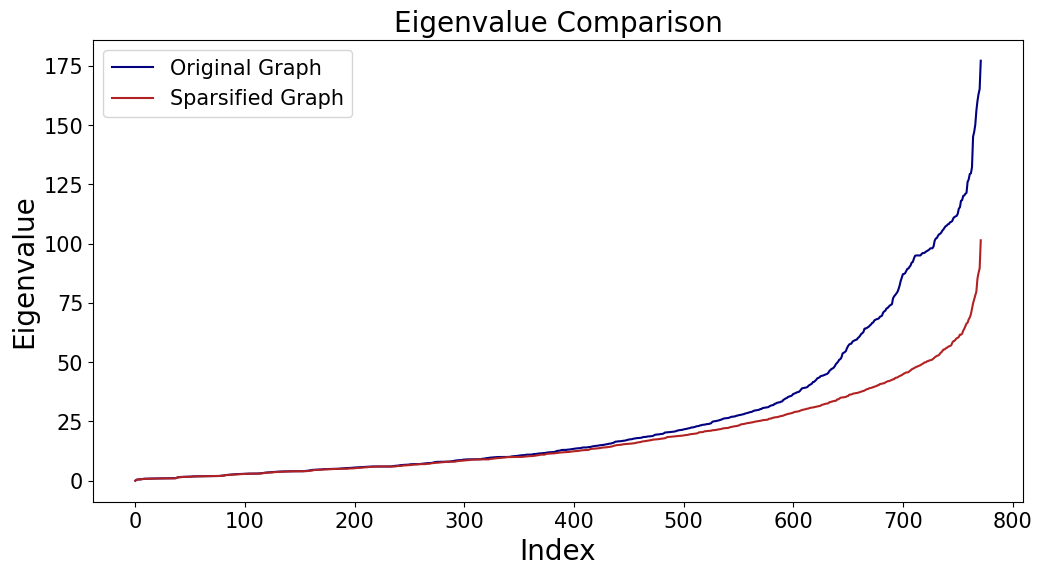

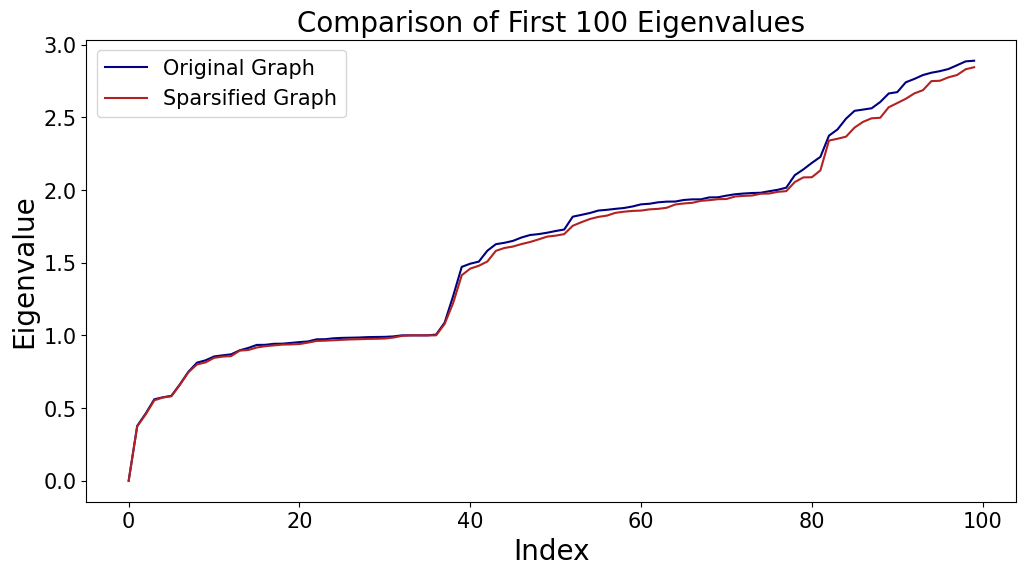

Relative Error for first 100 eigenvalues: 0.0274
Mean Squared Error for first 100 eigenvalues: 0.0021


In [10]:
networks = ['disease_on_genes', 'disease_on_symptoms', 'disease_on_drugs']

for layer in networks:
    print(layer.replace('_', ' '))
    
    non_spars_path = f'../00_Data/Non_sparsified_networks/{layer}.tsv'
    spars_path = f'../00_Data/Sparsified_networks/{layer}.tsv'
    orig_G = create_graph(non_spars_path)
    spars_G = create_graph(spars_path)

    full_spectral_analysis(orig_G, spars_G, 100)